
#Problem Statement :
#This dataset contains about 10 years of daily weather observations from many locations across Australia.
#RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? 
#This column is Yes if the rain for that day was 1mm or more. 
#Predict next-day rain by training classification models on the target variable RainTomorrow.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv("/content/weatherAUS.csv.zip")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [54]:
df.head()  #to show top 5

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [55]:
df.shape   #how many rows and columns

(142193, 24)

In [56]:
#to chcke null values
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

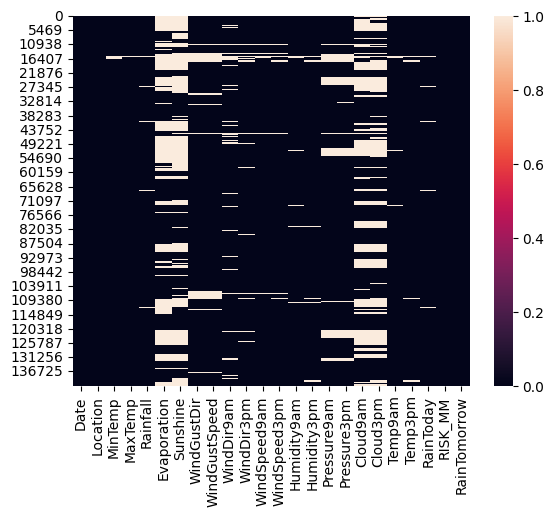

In [57]:
sns.heatmap(df.isnull())
plt.show()
     

In [58]:
#now to chcek the data types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [59]:
#first swork on categorical means object type of columns
s=(df.dtypes=='object')  #give data types
df_cat=list(s[s].index)   #to convert in list
print("categrical columns")
print(df_cat)
     

categrical columns
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [60]:
#now we check the null values in categorical columns
for i in df_cat:
  print(i,df[i].isnull().sum())  #because it is list we cannot write df_cat.isnull().sum() we need to use loop

Date 0
Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
RainToday 1406
RainTomorrow 0


In [61]:
#now we will fill this null values with mode because object null values are fullfill with mode
for i in df_cat:
  df[i].fillna(df[i].mode()[0],inplace=True)
     

In [62]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [63]:
#now we will do for numerical columns
t=(df.dtypes=='float64')
df_num=list(t[t].index)
print("Numerical type of columns")
print(df_num)

Numerical type of columns
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [64]:
#To check null values()
for i in df_num:
  print(i,df[i].isnull().sum())

MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726
RISK_MM 0


In [65]:
#fill null values with median
for i in df_num:
  df[i].fillna(df[i].median(),inplace=True)

In [66]:
#again to chck he null values
for i in df_num:
  print(i,df[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
RISK_MM 0


In [67]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

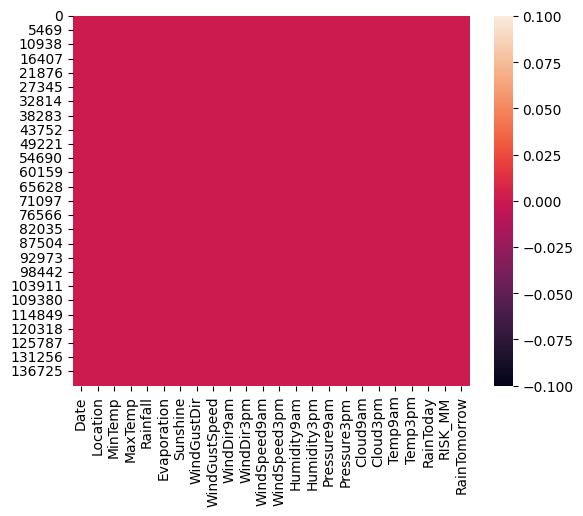

In [68]:
sns.heatmap(df.isnull())  #now there is no null values
plt.show()
     

In [69]:
#now we check the data typpes
df.dtypes
     

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

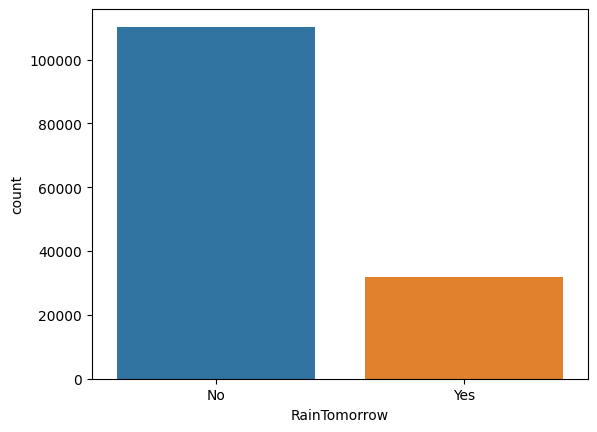

In [70]:
sns.countplot(data=df,x= "RainTomorrow")
plt.show()

In [71]:
#plt.figure(figsize=(18,18))
#sns.heatmap(df.corr(),annot=True)
#plt.show()
     

# Modelling

In [72]:
#apply Label encoder on catgorical data
from sklearn.preprocessing import LabelEncoder

In [73]:
#create the object for LabelEncoder
le=LabelEncoder()
for i in df_cat:
  df[i]=le.fit_transform(df[i])
   

In [74]:
df.head() #to check encoding

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0.0,0
1,397,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0.0,0
2,398,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0.0,0
3,399,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,1.0,0
4,400,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0


In [75]:
#seperate input and output
X=df.drop("RainTomorrow",axis=1)  #input
Y=df["RainTomorrow"]  #output

In [76]:
#train _test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [77]:
X_train.shape  #70% data

(99535, 23)

In [78]:
X_test.shape#30% data

(42658, 23)

In [79]:
#StandardScaler
#appling scaling on input
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
     

# 
 #to check scaling

In [80]:
#to check data balance or not
df["RainTomorrow"].value_counts()   #data is unbalanced

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [81]:
# ! pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ros =  RandomOverSampler()
X_train,Y_train = ros.fit_resample(X_train,Y_train)
X_test,Y_test = ros.fit_resample(X_test,Y_test)

In [82]:
pd.Series(Y_train).value_counts()   #to check the  balance or not

0    77177
1    77177
Name: RainTomorrow, dtype: int64

In [83]:
#Create neural Network
import tensorflow as tf
model=tf.keras.Sequential([tf.keras.layers.Dense(units=20,activation="relu",input_shape=(X.shape[1],)),
                           tf.keras.layers.Dense(units=16,activation="relu"),
                           tf.keras.layers.Dense(units=1,activation="sigmoid")])

In [84]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [85]:
#create the early stopping to prevent from the overfitting due to epochs(iteration)
#means we create call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [86]:
#trained the model
trained_model=model.fit(X_train,Y_train,batch_size=32,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
4824/4824 [==============================] - 13s 3ms/step - loss: 0.0962 - accuracy: 0.9602 - val_loss: 0.0177 - val_accuracy: 0.9933
Epoch 2/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.0124 - accuracy: 0.9955 - val_loss: 0.0138 - val_accuracy: 0.9944
Epoch 3/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0106 - val_accuracy: 0.9962
Epoch 4/50
4824/4824 [==============================] - 16s 3ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0062 - val_accuracy: 0.9982
Epoch 5/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0080 - val_accuracy: 0.9967
Epoch 6/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0078 - val_accuracy: 0.9967
Epoch 7/50
4824/4824 [==============================] - 17s 4ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0040 - val_ac

In [87]:
print("Training Loss and Training Accuracy:  ",model.evaluate(X_train,Y_train))  #training 
print("Testing Loss and Testing Accuracy:  ",model.evaluate(X_test,Y_test)) #testing


4824/4824 [==============================] - 7s 1ms/step - loss: 1.1391e-04 - accuracy: 1.0000
Training Loss and Training Accuracy:   [0.00011391370935598388, 1.0]
2072/2072 [==============================] - 3s 1ms/step - loss: 1.9969e-04 - accuracy: 0.9999
Testing Loss and Testing Accuracy:   [0.00019969478307757527, 0.9999396204948425]


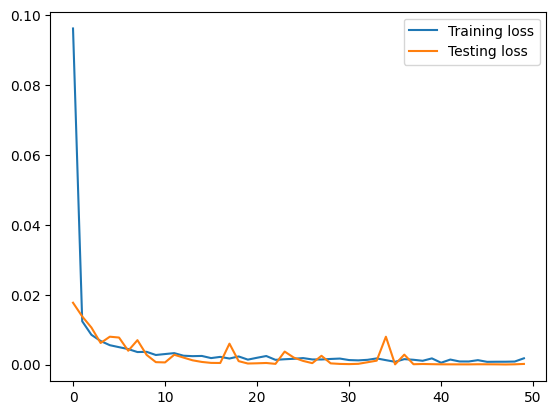

In [88]:
#now visualize the training and testing loss
plt.plot(trained_model.history["loss"],label="Training loss")
plt.plot(trained_model.history["val_loss"],label="Testing loss")
plt.legend()
plt.show()

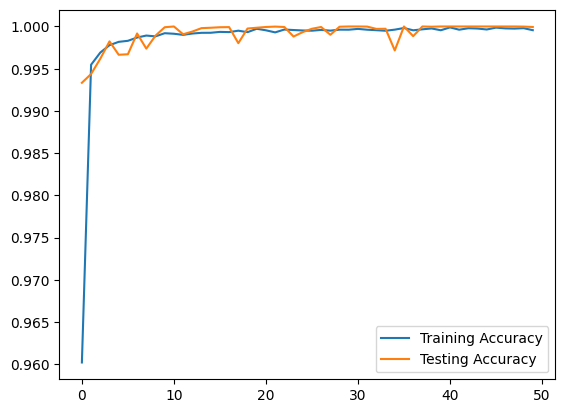

In [89]:
#Visualize  for Accuracy 
plt.plot(trained_model.history['accuracy'],label="Training Accuracy")
plt.plot(trained_model.history['val_accuracy'],label="Testing Accuracy")
plt.legend()
plt.show() 

In [90]:
#testing the model
Y_pred=model.predict(X_test).round(2)
Y_pred

2072/2072 [==============================] - 3s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [91]:
Y_pred=np.where(Y_pred>=0.5,1,0)   #to give predicted output in 0 &1
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [92]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
     

In [93]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33139
           1       1.00      1.00      1.00     33139

    accuracy                           1.00     66278
   macro avg       1.00      1.00      1.00     66278
weighted avg       1.00      1.00      1.00     66278

[[33138     1]
 [    3 33136]]


In [94]:
#so there is overfitting in the model so we use regularizers
from keras import regularizers
#from keras.layers import Dropout
model1=tf.keras.Sequential([tf.keras.layers.Dense(units=20,activation="relu",input_shape=(X.shape[1],),
                                                  kernel_regularizer=regularizers.l2(0.01)),
                           tf.keras.layers.Dense(units=16,activation="relu",
                                                  kernel_regularizer=regularizers.l2(0.01)),
                           tf.keras.layers.Dense(units=1,activation="sigmoid",
                                                 kernel_regularizer=regularizers.l2(0.01))])


In [95]:
#model.compile
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
#train the model
trained_model1=model1.fit(X_train,Y_train,batch_size=32,epochs=50,
                        validation_data=(X_test,Y_test),callbacks=callback)
     

Epoch 1/50
4824/4824 [==============================] - 13s 3ms/step - loss: 0.3362 - accuracy: 0.9457 - val_loss: 0.2958 - val_accuracy: 0.9614
Epoch 2/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.2862 - accuracy: 0.9661 - val_loss: 0.2853 - val_accuracy: 0.9667
Epoch 3/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.2857 - accuracy: 0.9661 - val_loss: 0.2848 - val_accuracy: 0.9670
Epoch 4/50
4824/4824 [==============================] - 12s 2ms/step - loss: 0.2854 - accuracy: 0.9660 - val_loss: 0.2861 - val_accuracy: 0.9670
Epoch 5/50
4824/4824 [==============================] - 12s 3ms/step - loss: 0.2852 - accuracy: 0.9667 - val_loss: 0.2869 - val_accuracy: 0.9561
Epoch 6/50
4824/4824 [==============================] - 15s 3ms/step - loss: 0.2848 - accuracy: 0.9670 - val_loss: 0.2840 - val_accuracy: 0.9632
Epoch 7/50
4824/4824 [==============================] - 13s 3ms/step - loss: 0.2846 - accuracy: 0.9674 - val_loss: 0.2835 - val_ac

In [47]:
print("training loss and training accuracy: ",model1.evaluate(X_train,Y_train))
print("Testing loss and Testing accuracy: ",model1.evaluate(X_test,Y_test))
     

4824/4824 [==============================] - 7s 1ms/step - loss: 0.2834 - accuracy: 0.9660
training loss and training accuracy:  [0.28338372707366943, 0.9659937620162964]
2072/2072 [==============================] - 3s 1ms/step - loss: 0.2845 - accuracy: 0.9645
Testing loss and Testing accuracy:  [0.2844758629798889, 0.9645282030105591]


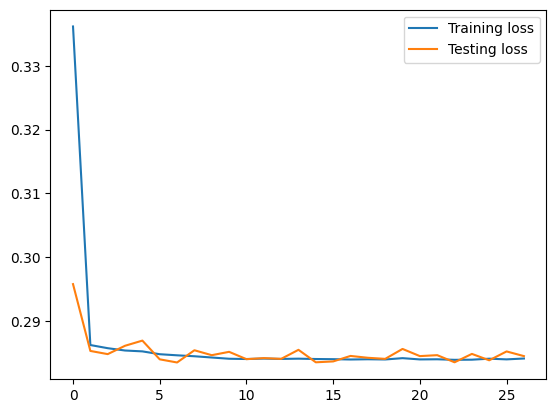

In [48]:
#now visualize the training and testing loss
plt.plot(trained_model1.history["loss"],label="Training loss")
plt.plot(trained_model1.history["val_loss"],label="Testing loss")
plt.legend()
plt.show()
     

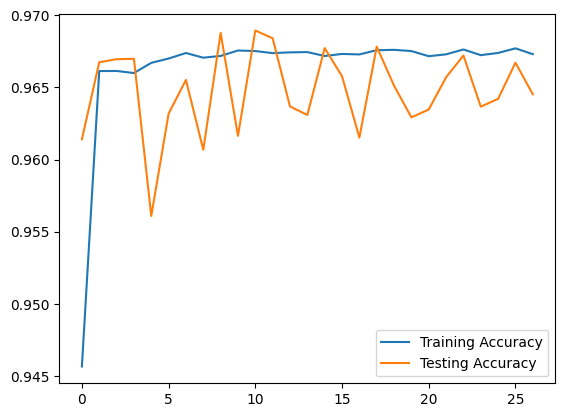

In [49]:

#now visualize the training and testing loss
plt.plot(trained_model1.history["accuracy"],label="Training Accuracy")
plt.plot(trained_model1.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()
     

In [50]:

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33139
           1       1.00      1.00      1.00     33139

    accuracy                           1.00     66278
   macro avg       1.00      1.00      1.00     66278
weighted avg       1.00      1.00      1.00     66278

[[33139     0]
 [    6 33133]]


# 

# Accuracy of this model is 1.00 which is very good